In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 100
n_clusters = 6
X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = n_clusters, random_state = 100)


In [2]:
#creating centers
#np.random.seed(4)
centers = np.empty((0,2))
for i in range(n_clusters):
    rand_line = np.random.randint(0, n_samples)
    print( rand_line )
    centers = np.append(centers, X[rand_line, :])

centers = np.reshape(centers, (n_clusters, 2))

65
46
24
31
25
7


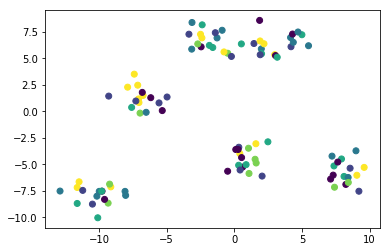

In [3]:
#adding to X clusters column
clusters = np.random.randint(0, n_clusters, (n_samples, 1))
X_with_clusters = np.append(X, clusters, axis=1)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])


In [4]:
X_with_clusters[:, 2]

array([1., 3., 3., 3., 5., 0., 4., 1., 3., 2., 5., 3., 0., 1., 1., 0., 5.,
       3., 4., 4., 2., 2., 0., 5., 3., 2., 0., 5., 0., 3., 5., 1., 4., 5.,
       5., 5., 1., 0., 0., 2., 0., 3., 3., 0., 4., 4., 1., 2., 2., 5., 5.,
       0., 3., 0., 3., 2., 2., 2., 5., 2., 1., 1., 1., 3., 2., 3., 1., 4.,
       3., 1., 3., 0., 5., 4., 5., 2., 5., 1., 5., 1., 2., 2., 4., 3., 5.,
       1., 5., 0., 0., 4., 5., 1., 2., 4., 2., 2., 0., 1., 0., 0.])

[0.45007145 0.22890358 4.56789505 1.08831117 0.56391333 1.61829991]
[0.75544751 1.05908221 2.51582307 0.         0.65492057 0.14998922]
[0.10847659 0.15227567 3.85687835 2.87241177 0.65492057 0.        ]
[0.28713531 0.14665035 1.14268264 2.16942528 0.30877893 0.        ]
[1.25767102 0.         0.40883824 0.         0.         0.        ]
[3.5308382  0.25575049 1.40638119 0.         0.39257867 0.        ]
[2.23250867 0.         2.86057373 0.         0.56245882 0.        ]
[0. 0. 0. 0. 0. 0.]


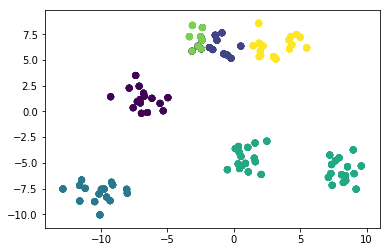

In [5]:
cur_clusters = np.zeros(n_samples, int)
difference = 5
while (np.max(difference) != 0):
    prev_centers = np.copy(centers)
    j = 0
    for i in X:
         center_X_difference = np.array([ m - i for m in centers ])
         #print(center_X_difference)
         cur_clusters[j] = np.argsort(np.linalg.norm((center_X_difference), axis=1))[0]
         j = j + 1
    X_with_clusters[:, 2] = cur_clusters    
    for k in range(n_clusters):
        power_of_cluster = np.alen(X[X_with_clusters[:,2] == k ])
        if power_of_cluster != 0:
            centers[k, :] = np.nansum(X[X_with_clusters[:, 2] == k], axis=0) / power_of_cluster
    difference = np.linalg.norm((centers - prev_centers), axis=1)
    print(difference)
    plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

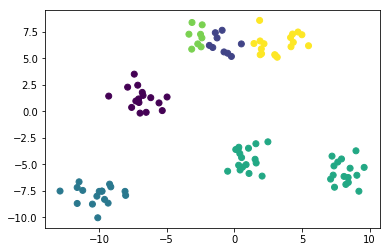

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:,2])

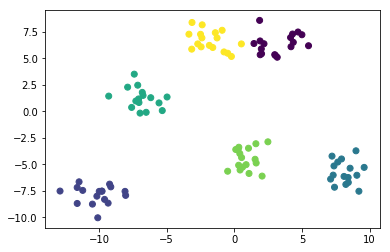

In [7]:
from sklearn.cluster import KMeans
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=a)